# psuedo-$C_l$

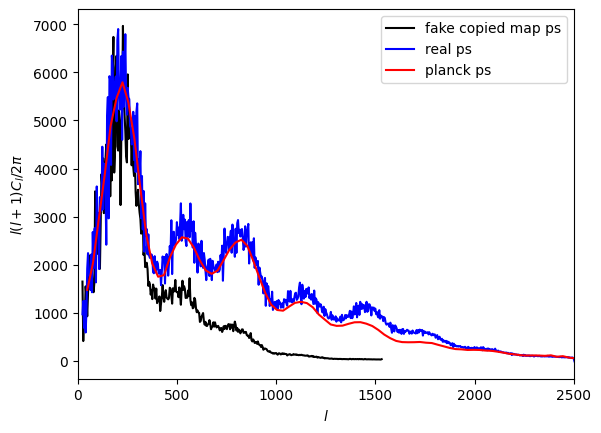

In [4]:
import numpy as np
import matplotlib.pyplot as plt

ell_cl = np.loadtxt('./output/copied_psuedo_cl.txt')
r_ell_cl = np.loadtxt('./output/psuedo_cl.txt') # real map
p_ell_dl = np.loadtxt('./output/planck_powerspec.txt') # planck map


fig, ax = plt.subplots()
first_l = 5

ell     = ell_cl[first_l:, 0]
r_ell   = r_ell_cl[first_l:, 0]

Cl      = ell_cl[first_l:, 1]
r_Cl    = r_ell_cl[first_l:, 1]

Dl      = ell * (ell + 1) * Cl / 2 / np.pi
r_Dl    = r_ell * (r_ell + 1) * r_Cl / 2 / np.pi
# ax.set_xscale('log')
ax.set_xlabel(r'$l$')
ax.set_ylabel(r'$l (l+1) C_l / 2 \pi$')
ax.plot(ell, Dl, '-k')
ax.plot(r_ell, r_Dl, '-b')
ax.plot(p_ell_dl[:,0], p_ell_dl[:,1], '-r')
ax.set_xlim(0, 2500)
# print(f"ell: \n{ell[:-1]}")
ax.legend(['fake copied map ps', 'real ps', 'planck ps'])

# Simulations' modulated $a_l$

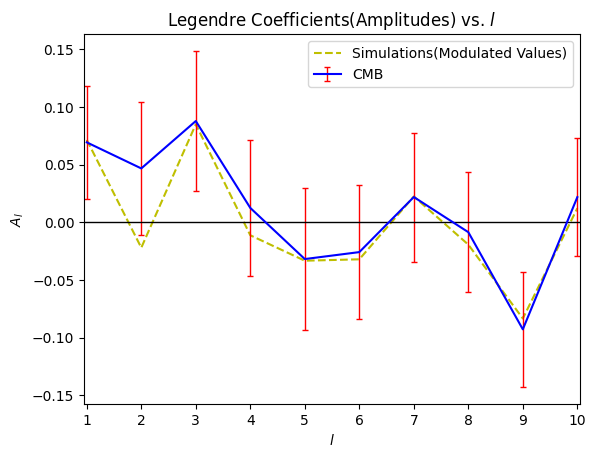

In [109]:
import numpy as np
import matplotlib as mpl, matplotlib.pyplot as plt
import os

cmb_a_l     = np.loadtxt('./output/cmb_a_l.txt')
sims_a_l    = np.loadtxt('./output/sims_a_l.txt')
max_l       = len(cmb_a_l) - 1

fig, ax     = plt.subplots()

avg_sims_result = np.mean(sims_a_l, axis=0)[1:]
std_sims_result = np.std(sims_a_l, axis=0)[1:]
l_coeff         = np.arange(max_l + 1)[1:]

# simulation values with modulation applied
ax.plot(l_coeff, avg_sims_result, 'y--')

# cmb with errorbars taken from simulations
ax.errorbar(l_coeff, cmb_a_l[1:], std_sims_result,
             color="b", ecolor='red', elinewidth=1,
             capsize = 2)

ax.legend(['Simulations(Modulated Values)', 'CMB'])

# csfont = {'fontname':'CMU Sans Serif'}
# hfont = {'fontname':'Helvetica'}

margin = 0.05
ax.hlines([0], xmin = 1 - margin, xmax = max_l + margin, color='k', linestyle='-', linewidth=1)
ax.set_xlabel(r'$l$')
ax.set_ylabel(r'$A_l$')
ax.set_xlim((1 - margin, max_l + margin))
ax.set_xticks(np.arange(1, max_l + 1, step=1))
ax.set_title('Legendre Coefficients(Amplitudes) vs. '+ r'$l$')
fig.savefig('./output/a_l_sims_modulated' + ".pdf", transparent=True)

# simulations' internal $a_l$

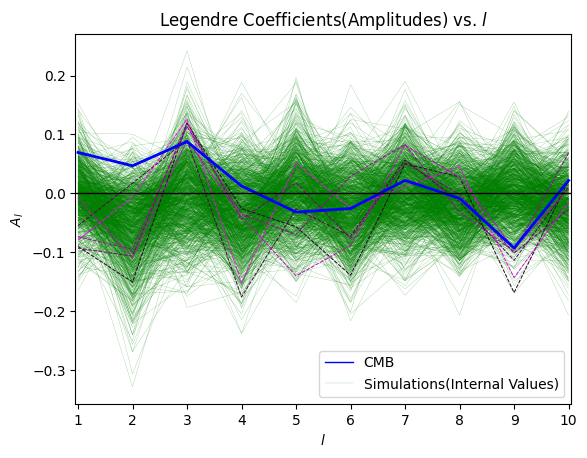

In [116]:
import numpy as np
import matplotlib as mpl, matplotlib.pyplot as plt
import os

cmb_a_l     = np.loadtxt('./output/cmb_a_l.txt')
sims_a_l    = np.loadtxt('./output/sims_internal_a_l.txt')
max_l       = len(cmb_a_l) - 1

fig, ax     = plt.subplots()

avg_sims_result = np.mean(sims_a_l, axis=0)[1:]
std_sims_result = np.std(sims_a_l, axis=0)[1:]
l_coeff         = np.arange(max_l + 1)#[1:]

# cmb with errorbars taken from simulations
ax.plot(l_coeff[1:], cmb_a_l[1:], '-b', linewidth=1)

# simulation values with modulation applied
for i in range(len(sims_a_l)):
    ax.plot(l_coeff[1:], sims_a_l[i][1:], '-g', linewidth = .1)

# l = 3 and l = 9 are nonzero!
_filter = (cmb_a_l[3] < sims_a_l[:, 3]) * (cmb_a_l[9] > sims_a_l[:, 9])
i = 0
odd_indices = np.arange(len(_filter))[_filter]
for index in odd_indices:
    i +=1
    ax.plot(l_coeff[1:], sims_a_l[index][1:], '--', linewidth = .7, color=(i/len(odd_indices),0, i/len(odd_indices) ))


ax.plot(l_coeff[1:], cmb_a_l[1:], '-b', linewidth=2)

ax.legend(['CMB', 'Simulations(Internal Values)'])

# csfont = {'fontname':'CMU Sans Serif'}
# hfont = {'fontname':'Helvetica'}

margin = 0.05
ax.hlines([0], xmin = 1 - margin, xmax = max_l + margin, color='k', linestyle='-', linewidth=1)
ax.set_xlabel(r'$l$')
ax.set_ylabel(r'$A_l$')
ax.set_xlim((1 - margin, max_l + margin))
ax.set_title('Legendre Coefficients(Amplitudes) vs. '+ r'$l$')
ax.set_xticks(np.arange(1, max_l + 1, step=1))
fig.savefig('./output/a_l_sims_internal' + ".pdf", transparent=True)

# Dot product of CMB strips and Simulations

0.3760172994168222
p-value = 0.006


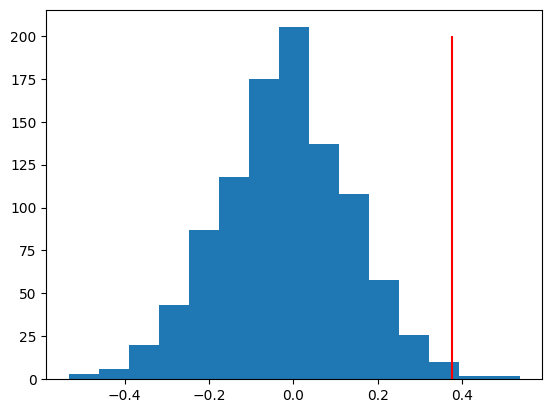

In [117]:
import numpy as np
import matplotlib.pyplot as plt

cmb_a_l     = np.loadtxt('./output/cmb_a_l.txt')
sims_a_l    = np.loadtxt('./output/sims_internal_a_l.txt')
max_l       = len(cmb_a_l) - 1

def legendre_dot(f_a_l, g_a_l, l_start):
    max_l = len(f_a_l)
    components = np.array([(2*l + 1) / 2 * f_a_l[l] * g_a_l[l] for l in range(l_start, max_l)])
    return np.sum(components)

nsims = len(sims_a_l)
cmb_length = np.sqrt(legendre_dot(cmb_a_l, cmb_a_l, 1))
print(cmb_length)
dots = np.array([legendre_dot(cmb_a_l, sims_a_l[i], 1) / cmb_length for i in range(nsims)])

plt.hist(dots, bins = 15);
plt.vlines([cmb_length], ymin = 0, ymax = 200, colors=['r'])

print("p-value = {}".format(np.sum(dots > cmb_length) / len(dots)))

# $a_l$ p-value

count:  6
p-value:  0.006


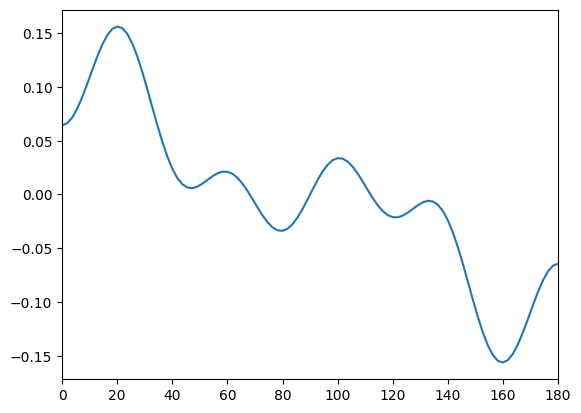

In [121]:
# which ones show
# _filter = (cmb_a_l[1] < sims_a_l[:, 1])
# _filter = (cmb_a_l[3] < sims_a_l[:, 3])
# _filter = (cmb_a_l[9] > sims_a_l[:, 9])
_filter = (cmb_a_l[3] < sims_a_l[:, 3]) * (cmb_a_l[9] > sims_a_l[:, 9])
print("count: ", np.sum(_filter))
print("p-value: ", np.sum(_filter) / len(sims_a_l))
# plot
x = np.linspace(0, np.pi, 100)
xcos = np.cos(x)
y = np.sum(np.array([cmb_a_l[l] * np.polynomial.Legendre.basis(l)(xcos) for l in [1, 3, 9]]), axis = 0)
plt.plot(x * 180 / np.pi, y)
plt.xticks(np.arange(0, 190, step=20));
plt.xlim((0, 180));

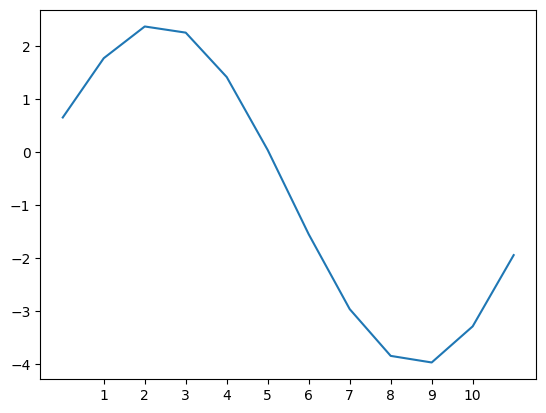

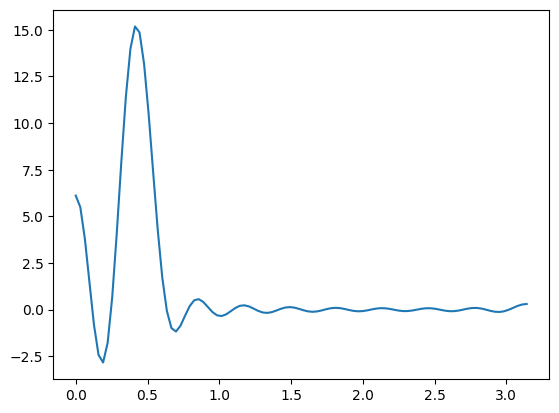

In [120]:
import numpy as np
import matplotlib as mpl, matplotlib.pyplot as plt

def legendre(n, x):
    '''Legendre Polynomials'''
    if(n == 0): # P0 = 1
        return np.ones(len(x)) if type(x) == np.ndarray else 1 
    elif(n == 1): # P1 = x
        return x
    else:
        return (((2*n)-1) * x * legendre(n-1, x) - (n-1) * legendre(n-2, x)) / float(n)


a_l = np.loadtxt('./output/step_a_l.txt')
plt.plot(np.arange(12), a_l[:12])
plt.xticks(np.arange(1, max_l + 1, step=1))
plt.show()

x = np.linspace(0, np.pi, 100)

y = np.sum(np.array([a_l[i] * legendre(i, np.cos(x)) for i in range(0,20)]), axis=0)

plt.plot(x, y)
plt.show()


# measures with errors